In [ ]:
https://pythontic.com/visualization/signals/fouriertransform_fft

# Practical Session 1
## Biomedical Signal and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Hamza Mekhzoum, Jakub Ceranka and Jef Vandemeulebroucke <br>
<br>
Questions email or Teams: jakub.ceranka@vub.be, hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs:Faiza Tasnia (0563547) & Siyan Luo (0594750) </font> <Br>
<font color=blue>Academic Year </font>: 2022-2023

In all the practical sessions of this course we will use python 3 and jupyter notebooks. We will use google´s environment called 'colab'. https://colab.research.google.com .You will only need a gmail. Colab is equipped with most of the libraries 
we will need in this semester. In case a module is not installed, you can install it with 'pip'. 

# Purpose
The purpose of this exercise session is to obtain insight into the basic signal processing concepts; aliasing, Fourier transform and filtering commonly applied in medical signal and image analysis. For more information on these concepts, check the course slides and notes. 

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two </b> students. In colab you should download the notebook in the format \*.ipynb and save it as a pdf version through print->save as pdf. <b>Both</b> the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The <b>deadline</b> for the first report is the <b>21st of November 2022 at 23:59</b>. Any report sent after the deadline will not be graded.

### Required modules

During this practical session, the following libraries will be used:
- numpy
- matplotlib
- scipy

To import any external library, you need to import it using the **import** statement followed by the name of the library.

### Exercise 1: Discrete Fourier Transform

Consider a sine wave signal with frequency f=5Hz and duration Tt=1s. Sample the signal with a sampling frequency fs=256Hz.

Generate the fourier transform, i.e. the spectral decomposition of the signal.

Spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum).

Report:
- Plot the sampled signal (use discrete points '*'). You can define the time axis with function https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html 
Be careful <b>not</b> to include the last point of the generated time axis

- Calculate the fourier transform of the discrete signal using functions https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html and plot the magnitude of its fourier transform with the help of function https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html


Do not forget to label the axes accordingly.

*Hint:*
Since we are going to compute a fourier transform in all the exercises of this WPO, it is better to define a function 

e.g def create_fourier_transform(signal,fs):

        .......
        
        return frequencies,fourier_transform


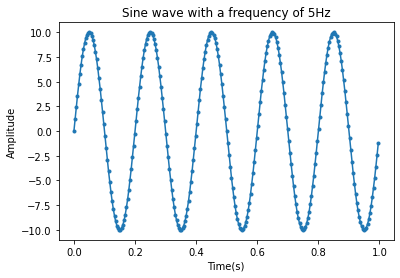

In [2]:
#Your code here:
import numpy as np
import scipy

import matplotlib.pyplot as plt

frequency = 5;
sampling_frequency = 256;
amplitude = 10;

Tt = np.arange(0.0,1.0,1.0/sampling_frequency)  # time (1s)
N = len(Tt)                       # number of time points

x = amplitude*np.sin(2*np.pi*frequency*Tt)   # the signal equation
plt.plot(Tt,x,'.-')
# label the axes
plt.title("Sine wave with a frequency of 5Hz")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

In [3]:
def fourier_transform(signal,fs):
    fourier_transform = np.fft.fft(signal);               # Fourier Transform
    #Tt = np.arange(0.0,1.0,1.0/fs)   # time (1s)
    #N = len(Tt)                       # number of time points

    #frequencies = np.linspace(0.0,N-1.0,N);    # vector of frequencies for plotting
    n = signal.size
    # Since n = fs, is it necessary to pass the parameter fs?
    # timestep = 0.1
    timestep = 1/fs
    freq = np.fft.fftfreq(n, d=timestep)
    return fourier_transform,freq

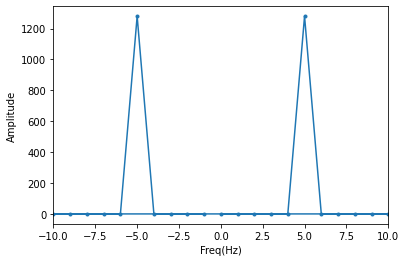

In [4]:

y,freq=fourier_transform(x,sampling_frequency)
plt.plot(freq,np.abs(y),'.-');      # plotting magnitude of the FFT
plt.xlabel('Freq(Hz)')
plt.xlim([-10,10])

plt.ylabel('Amplitude')
plt.show()

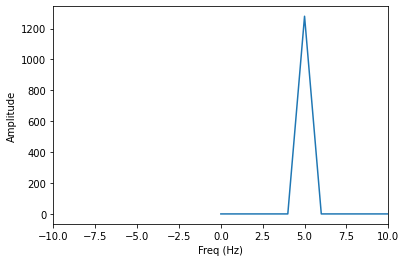

In [5]:
plt.plot(freq[:N//2],np.abs(y[:N//2]))   # plotting half of fft results
plt.xlabel('Freq (Hz)') #  x-axis
plt.xlim([-10,10])

plt.ylabel('Amplitude')              
plt.show()

From the spectrum analysis of the signal, where do you see the frequency? 

<font color=blue>Your reply here:
There are two frequency components visible from the above plots which are 5 Hz and -5 Hz. The reason for this is that the sine wave can be written a sum of two exponentials.
 The corresponding amplitudes at these frequencies (5 and -5) are Amplitude/2, where A = 10, 
therefore the absolute amplitude is 10/2 = 5.
</font>

### Exercise 2: Sampling
Generate a signal with a duration of 1s that consists of the sum of the following harmonics. Each harmonic is given by the equation $ amplitude sin(2 \pi t f) $

- 10 Hz with amplitude 0.3
- 30 Hz with amplitude 0.4
- 50 Hz with amplitude 0.5
- 80 Hz with amplitude 0.2 \
Step 1. Compute the Fourier transform when the frequency spectrum is sampled at 200Hz.\
Step 2 Change the sampling frequency to 100Hz and compute the Fourier transform again.\
Report:
- Plot the signal sampled at the two different sample frequencies( Use a continuous line and not discrete points)
- Plot the two Fourier transforms with the two different sampling frequencies.


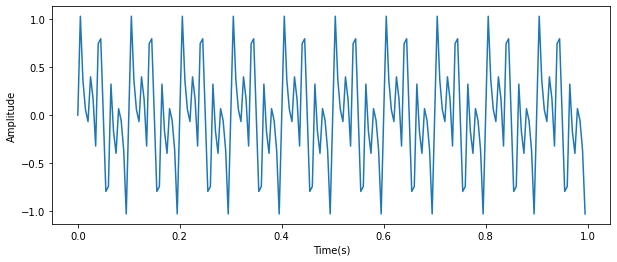

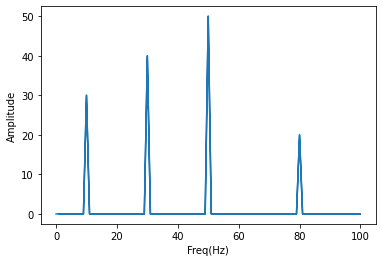

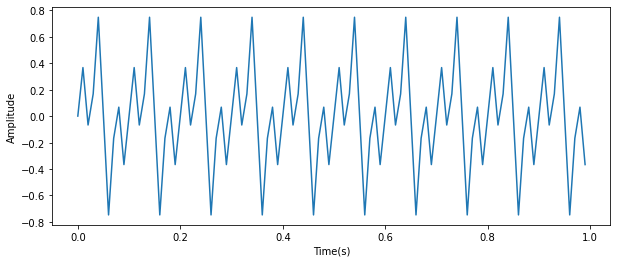

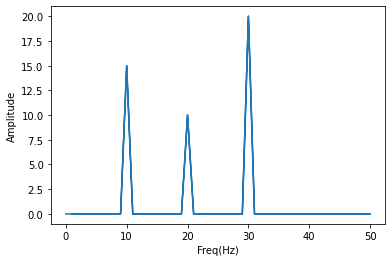

In [6]:
#Your code here:
import numpy as np
import matplotlib.pyplot as plt

def create_fourier_transform(signal,fs):
    fourier_transform = np.fft.fft(signal)
    timestep = 1/fs
    frequencies = np.fft.fftfreq(fs,d=timestep)
    return frequencies,fourier_transform

def create_sine(amplitude,fs,frequency):
    t = np.linspace(0, 1, fs, endpoint = False)
    # frequency
    sine = amplitude*np.sin(2*np.pi*t*frequency)
    return sine
  
def plot_sine(sine,fs):
    t = np.linspace(0, 1, fs, endpoint = False)
    plt.figure(figsize=(10,4))
    plt.plot(t,sine)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_fft(freqs,ftt):
    plt.plot(np.abs(freqs), np.abs(ftt))
    plt.xlabel('Freq(Hz)')
    plt.ylabel('Amplitude')
    plt.show()

  # frequency rate = 200
fs = 200
sine200 = create_sine(0.3,fs,10)+create_sine(0.4,fs,30)+create_sine(0.5,fs,50)+create_sine(0.2,fs,80)
plot_sine(sine200,fs)
freq,ft = create_fourier_transform(sine200,fs)
plot_fft(freq,ft)

# frequency rate = 100
fs = 100
sine100 = create_sine(0.3,fs,10)+create_sine(0.4,fs,30)+create_sine(0.5,fs,50)+create_sine(0.2,fs,80)
plot_sine(sine100,fs)
freq,ft = create_fourier_transform(sine100,fs)
plot_fft(freq,ft)

Describe what do you observe in the generated spectrums and why.

<font color=blue>Your reply here: When the frequency rate = 200, in the fourier transform plot, we can observe that there're four amplitudes which locate at corresponding frenquencies(10,30,50,80). When the frequency rate reduces to 100, the sine wave is more seperate. In the fourier transform plot, we can only observe 3 amplitudes (10,20,30). The reason is, according to sampling theorem, the theoretical maximum frequency that can be determined by fft is half of the frequency rate, which is 2/100=50.  </font>

### Exercise 3: Filtering
Design a filter that filters the signal of the second exercise so that only frequencies 30 and 50 pass. Consider sampling frequency of 200Hz. 
- Design a digital butterworth bandpass filter of 10th order using the signal.butter function from the scipy module.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html Change the definitions appropriately! Get the output as output='ba'. You will need the values of a,b in the following step
- Plot the frequency response of the <b>digital</b> filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
- Filter the signal with the designed filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
- Plot the fourier transform of the filtered signal

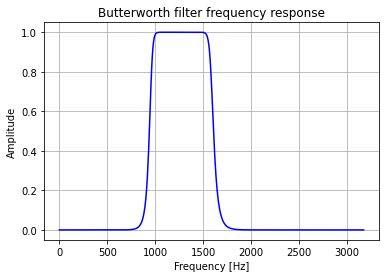

In [7]:
#Your code here:
from scipy import signal
import matplotlib.pyplot as plt
sample_freq = 200
b, a = signal.butter(10, [30,50], 'bandpass',output = 'ba',fs =sample_freq)
w, h = signal.freqz(b, a, fs=sample_freq);
# convert rad/sample to Hz, denormalization
ff =(sample_freq *0.5 /np.pi)*w;
plt.plot(ff, abs(h), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True,which='both')
# plt.xlim(0, 100)
plt.show()

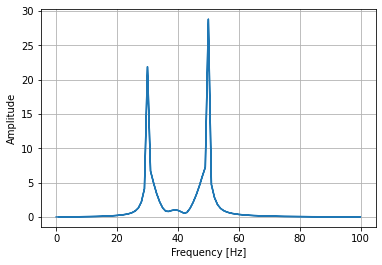

In [8]:
fs = 200
# Use lfilter_zi to choose the initial condition of the filter
# scipy.signal.lfilter_zi(b, a)
# Construct initial conditions for lfilter for step response steady-state.
# zi1-D ndarray. The initial state for the filter.
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a,sine200, zi=zi*sine200[0])
# f, zf= fourier_transform(z,200,200 * 1)
# f, zf = fourier_transform(z,fs)
freq, ft = create_fourier_transform(z,fs)

plt.grid(True)
# plt.plot(f,np.abs(zf), label='Filter Signal')
plt.plot(np.abs(freq),np.abs(ft))
# plt.title('Fourier Transform filter ')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
# plt.legend()
plt.show()

What do you obsserve in the spectrum of the filtered signal?<br>
<font color=blue> Your reply here:
Considering the signals that consists of 10 Hz,30Hz,50Hz and 80 Hz with their amplitudes of 0.3,0.4,0.5 and 0.2 respectively of the given sine waves.The signals of 10 Hz and 80 Hz are filtered out after the process produces the filtered signals of 30 Hz and 50 Hz respectively in the second figure because the butterworth filter is designed to allow for the frequencies between 30 Hz and 50 Hz in the above figure as Fourier transform for transferring its function.The implementation of the digital filter requires that the cut-off frequency be normalized by the filtered signals, which explains the slight distortion brought on by the fourier transform signal.
 </font>